# Compare LES and RANS results

1. Load the PKL file containing resampled P
2. Show statistics of signals
2. Load RANS data
3. Plot both signals along x-axis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle, random

from math import pi

In [2]:
def ElliotBrooksCalc(x,l,H,d,u,g=9.81):
    '''
    l : bedform wavelenght
    H : dune height
    d : mean flow depth
    u : mean flow velocity
    g : gravity acc
    '''
    if H/d <= 0.34:
        n = 3./8.
    else:
        n = 3./2.
    
    hm = 0.28 * u**2/(2*g) * (H/d/0.34)**n
    k  = 2*pi/l
    h = hm * np.sin(k*x + pi/2)
    return h

In [3]:
# Load LES data
fpath = "pickledData_constg/PTX(3).pkl"
with open(fpath,'rb') as f: P_LES = pickle.load(f)

fpath = "RANS_ResultToCompare/From3D/RANS_p.result"
P_RAS = pd.read_csv(fpath)

In [4]:
elliot_dict = dict(l=0.15, H=0.015, d=0.0975 ,u=0.15)
hElliot = ElliotBrooksCalc(P_RAS['X'],**elliot_dict)

NumExpr defaulting to 8 threads.


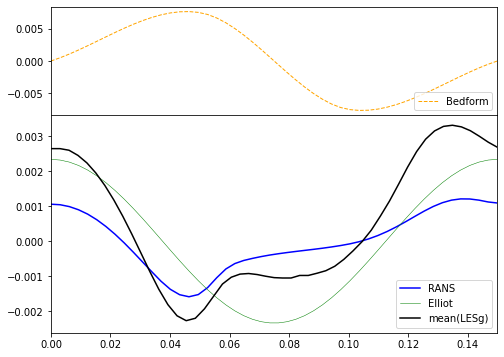

In [11]:
fig, axs = plt.subplots(2,1,sharex=True,figsize=[8,6],\
                        gridspec_kw={'hspace':0,'height_ratios':[0.5,1]})
ax = axs[0]
ax.plot(P_RAS['X'],P_RAS['Y'],c='orange',lw=1,ls='dashed',label='Bedform')
ax.legend(loc='lower right')

ax = axs[1]
ax.plot(P_RAS['X'],P_RAS['p'],c='b',label='RANS')
ax.plot(P_RAS['X'],hElliot*9.81,c='g',lw=0.5,label='Elliot')
ax.plot(P_LES.columns,P_LES.mean(),c='k',label='mean(LESg)')
ax.legend(loc='lower right')
ax.set(xlim=[0,0.15])
plt.show()